## Observations and Insights 

In [179]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata, on = "Mouse ID")

# Display the data table for preview
combined_df.head(10)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [180]:
# Checking the number of mice.
unique_mice = len(pd.unique(combined_df["Mouse ID"]))
unique_mice

249

In [181]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicated_rows_df_total = combined_df[combined_df.duplicated(["Mouse ID","Timepoint"])]
duplicated_rows_df_id = duplicated_rows_df_total.drop(["Timepoint","Tumor Volume (mm3)","Metastatic Sites","Drug Regimen","Sex", "Age_months","Weight (g)"], axis = 1)

duplicated_rows_df_id = duplicated_rows_df_id.set_index("Mouse ID")

duplicated_rows_df_id = duplicated_rows_df_id.groupby(["Mouse ID"]).count()

duplicated_rows_df_id


""
Mouse ID
g989


In [182]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_rows_df_total


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [183]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
################### how would you set it equal to my list I have, duplicated_rows_df_id
combined_df = combined_df.drop(combined_df[combined_df["Mouse ID"] == "g989" ].index)

combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [184]:
# Checking the number of mice in the clean DataFrame.
# Checking the number of mice. prior number was 249
unique_mice = len(pd.unique(combined_df["Mouse ID"]))
unique_mice

248

## Summary Statistics

In [185]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_stats_df = combined_df.drop(columns = {"Mouse ID","Timepoint","Metastatic Sites", "Sex", "Age_months", "Weight (g)"})

#create statistical columns
tumor_volume_mean = summary_stats_df.groupby("Drug Regimen").mean()
tumor_volume_median = summary_stats_df.groupby("Drug Regimen").median()
tumor_volume_stddev = summary_stats_df.groupby("Drug Regimen").std()
tumor_volume_sem = summary_stats_df.groupby("Drug Regimen").sem()

#merge statistical columns
tumor_stats_summary_df = pd.merge(tumor_volume_mean,tumor_volume_median, on = "Drug Regimen")
#rename first two columns
tumor_stats_summary_df = tumor_stats_summary_df.rename(columns = {"Tumor Volume (mm3)_x":"Tumor Volume Mean","Tumor Volume (mm3)_y":"Tumor Volume Median"})
#merge remaining columns
tumor_stats_summary_df = pd.merge(tumor_stats_summary_df,tumor_volume_stddev, on = "Drug Regimen")
tumor_stats_summary_df = pd.merge(tumor_stats_summary_df,tumor_volume_sem, on = "Drug Regimen")

#rename columns remaining columns
tumor_stats_summary_df = tumor_stats_summary_df.rename(columns = {"Tumor Volume (mm3)_x":"Tumor Volume Std Dev","Tumor Volume (mm3)_y":"Tumor Volume SEM"})

tumor_stats_summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Std Dev,Tumor Volume SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [186]:
####################### how to calculate in agg method
st.sem(combined_df["Tumor Volume (mm3)"])

0.20559062186986257

In [187]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumor_stats_summary_agg_df = combined_df.groupby(["Drug Regimen"]).agg(Tumor_Volume_Mean=("Tumor Volume (mm3)",np.mean),Tumor_Volume_Median=("Tumor Volume (mm3)",np.median),Tumor_Volume_Std_Dev=("Tumor Volume (mm3)",np.std)) 

tumor_stats_summary_agg_df

,Tumor_Volume_Mean,Tumor_Volume_Median,Tumor_Volume_Std_Dev
Drug Regimen,,,
Capomulin,40.675741,41.557809,4.994774
Ceftamin,52.591172,51.776157,6.268188
Infubinol,52.884795,51.820584,6.567243
Ketapril,55.235638,53.698743,8.279709
Naftisol,54.331565,52.509285,8.134708
Placebo,54.033581,52.288934,7.821003
Propriva,52.320930,50.446266,6.622085
Ramicane,40.216745,40.673236,4.846308
Stelasyn,54.233149,52.431737,7.710419


## Bar and Pie Charts

Text(0, 0.5, 'Count of Measurements')

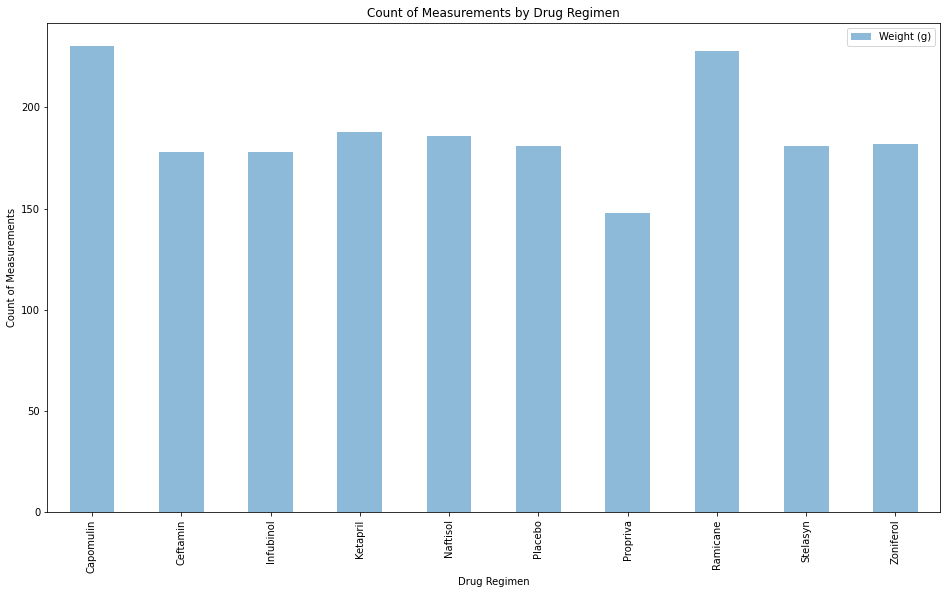

In [188]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

total_measurements = combined_df.groupby(["Drug Regimen"]).count()
total_measurements = total_measurements.drop(["Mouse ID","Timepoint","Tumor Volume (mm3)","Metastatic Sites","Sex","Age_months"], axis = 1)
total_measurements
measurements_bar = total_measurements.plot(kind = "bar", figsize = (16,9), alpha = 0.5, title = "Count of Measurements by Drug Regimen")

measurements_bar.set_xlabel("Drug Regimen")
measurements_bar.set_ylabel("Count of Measurements")

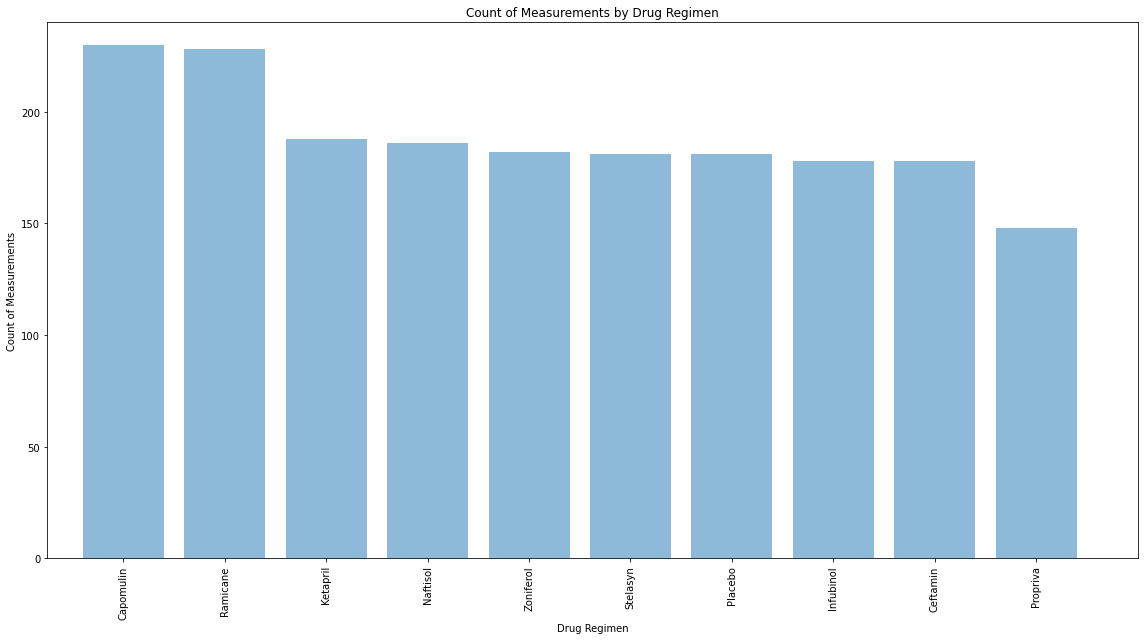

In [189]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

total_measurements_value_count = combined_df["Drug Regimen"].value_counts()
#total_measurements_value_count

#total_measurements 
x_axis = np.arange(len(total_measurements_value_count))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(16,9))
plt.bar(x_axis, total_measurements_value_count.values, alpha = 0.5, align = "center")
plt.xticks(tick_locations, total_measurements_value_count.index.values, rotation="vertical")

plt.xlim(-.75,len(x_axis))
plt.ylim(0,max(total_measurements_value_count.values)+10)

plt.title("Count of Measurements by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Measurements")

plt.tight_layout()



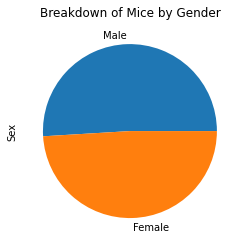

In [190]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_df_pd = combined_df["Sex"].value_counts()
gender_pie = sex_df_pd.plot(kind = "pie", title = "Breakdown of Mice by Gender")

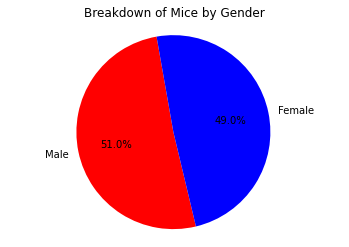

In [191]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_df_pyplt = combined_df["Sex"].value_counts()
sex_df_pyplt

sex = sex_df_pyplt.index.values
sex_counts = sex_df_pyplt.values
colors = ["red","blue"]

plt.pie(sex_counts, labels = sex, colors = colors, autopct="%1.1f%%", startangle = 100)
plt.axis("equal")
plt.title("Breakdown of Mice by Gender")
plt.show()


## Quartiles, Outliers and Boxplots

In [192]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_tp = combined_df.drop(["Tumor Volume (mm3)","Metastatic Sites","Drug Regimen", "Sex","Age_months","Weight (g)"],axis = 1)
greatest_tp_df = pd.DataFrame(greatest_tp)
greatest_tp_df = greatest_tp_df.groupby("Mouse ID", as_index=False).max()
#greatest_tp_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_timepoint_df = pd.merge(greatest_tp_df,combined_df, on = ["Mouse ID","Timepoint"])
max_timepoint_df = max_timepoint_df.drop(["Metastatic Sites","Sex","Age_months","Weight (g)"],axis = 1)
max_timepoint_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a262,45,70.717621,Placebo
3,a275,45,62.999356,Ceftamin
4,a366,30,63.440686,Stelasyn
...,...,...,...,...
243,z435,10,48.710661,Propriva
244,z578,45,30.638696,Ramicane
245,z581,45,62.754451,Infubinol
246,z795,45,65.741070,Naftisol


In [201]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen = max_timepoint_df.drop(["Mouse ID","Timepoint","Tumor Volume (mm3)"],axis = 1)

#drug_regimen = [x for x in drug_regimen]
drug_regimen = drug_regimen.groupby("Drug Regimen")
drug_regimen = pd.DataFrame(drug_regimen)
drug_regimen
# Create empty list to fill with tumor vol data (for plotting)

volumes = max_timepoint_df["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = volumes.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq - lowerq
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [194]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_df = combined_df.copy()
capomulin_df_orig = capomulin_df[capomulin_df["Drug Regimen"] == "Capomulin"]
sample = capomulin_df["Mouse ID"].sample(1)
sample = sample.values
sample[0]


'i477'

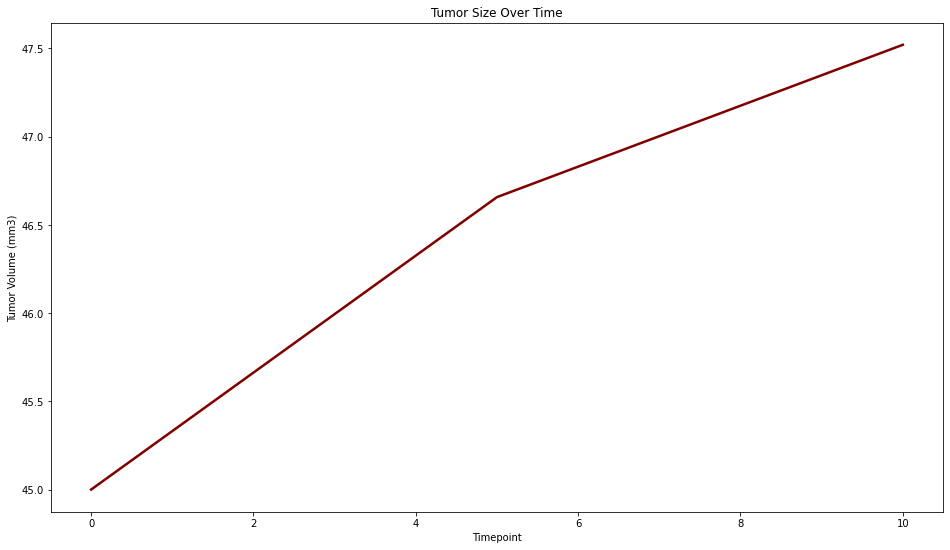

In [195]:
sample_df = capomulin_df[capomulin_df["Mouse ID"] == "i477"]
sample_df = sample_df.drop(["Metastatic Sites","Sex","Age_months","Weight (g)","Drug Regimen"], axis =1)
sample_df = sample_df.set_index("Mouse ID")
sample_df.set_index("Timepoint")["Tumor Volume (mm3)"].plot(figsize=(16,9), linewidth = 2.5, color = "maroon")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Size Over Time")
plt.show()

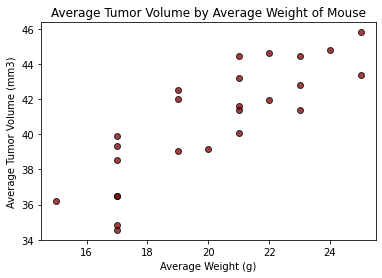

In [196]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

average_capomulin_df = capomulin_df_orig.groupby(["Mouse ID"]).mean()
average_capomulin_df = average_capomulin_df.drop(["Timepoint","Metastatic Sites","Age_months"],axis=1) 
#average_capomulin_df

#plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",s=x_axis, alpha=0.75)
plt.scatter(average_capomulin_df["Weight (g)"], average_capomulin_df["Tumor Volume (mm3)"], marker = "o" , facecolors = "maroon", edgecolors = "black", alpha = 0.75)
plt.title("Average Tumor Volume by Average Weight of Mouse")
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between average weight and average tumor volume is 0.84


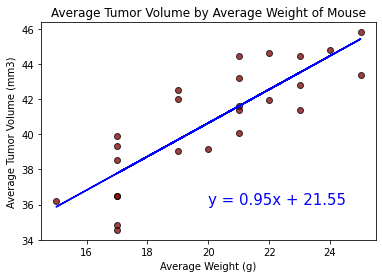

In [200]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(average_capomulin_df["Weight (g)"], average_capomulin_df["Tumor Volume (mm3)"])
print(f"The correlation between average weight and average tumor volume is {round(correlation[0],2)}")

#find the slope intercept rvalue pvalue and stderr
(slope, intercept, rvalue, pvalue, stderr) = linregress(average_capomulin_df["Weight (g)"], average_capomulin_df["Tumor Volume (mm3)"])

#calc the plots for the regression line
regress_values = average_capomulin_df["Weight (g)"] * slope + intercept

#regression annotation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(average_capomulin_df["Weight (g)"], average_capomulin_df["Tumor Volume (mm3)"], marker = "o" , facecolors = "maroon", edgecolors = "black", alpha = 0.75)



plt.title("Average Tumor Volume by Average Weight of Mouse")
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")



plt.plot(average_capomulin_df["Weight (g)"],regress_values,"b-")
plt.annotate(line_eq,(20,36),fontsize=15,color="blue")

plt.show()